# Topics for the Day!
## 1. Data Summarization
## 2. Counts & Cross - tabs
## 3. Loops in R
## 4. List objects
## 5. Apply functions
## 6. Set - Functions
## 7. User-defined Functions
## 8. Graphs

# 1. Data Summary

## Task #1 Read the csv file (customers.csv) into a dataframe
## Task #2 Check the structure of data and see that it is correctly loaded.
## Task #3 Find the average spend by Segment!

Hint:
Use read.csv() to read the data
Use str() and head() to check data!

In [54]:
getwd()
df <- read.csv('newcustomers.csv')

[1] "/var/app/anaconda/projects/ya02780/RTrainingDay2"

In [55]:
#Check data structure
str(df)

'data.frame':	10000 obs. of  11 variables:
 $ CustomerID      : int  4508180 4748935 4840377 4885562 7038128 8696866 9554684 9669235 10198570 10311140 ...
 $ Keycode         : Factor w/ 297 levels "A02","A1","A3",..: 7 7 98 129 11 63 221 12 64 65 ...
 $ ResponseDate    : Factor w/ 25 levels "01/02/2010","01/03/2010",..: 19 11 20 21 15 22 22 13 3 10 ...
 $ PreviousOrders  : int  13 16 18 18 11 8 10 14 12 15 ...
 $ MarketingChannel: Factor w/ 4 levels "C","D","E","F": 4 4 4 4 2 4 4 4 4 4 ...
 $ Type            : Factor w/ 3 levels "","N","R": 3 3 3 3 3 3 3 3 3 3 ...
 $ Zip             : int  34698 33852 7481 16511 38016 97013 99350 93013 18603 30512 ...
 $ Age             : int  97 92 84 93 92 94 91 104 80 79 ...
 $ Segment         : Factor w/ 4 levels "","A","B","C": 2 2 2 2 2 2 2 2 2 2 ...
 $ TotalSpending   : num  NA NA 40 NA NA NA 25 NA NA NA ...
 $ TotalPurchases  : int  NA NA 4 NA NA NA 2 NA NA NA ...


In [56]:
#check first 5 Rows
head(df,n=5)

CustomerID,Keycode,ResponseDate,PreviousOrders,MarketingChannel,Type,Zip,Age,Segment,TotalSpending,TotalPurchases
4508180,AA1,01/20/2010,13,F,R,34698,97,A,NA,NA
4748935,AA1,01/12/2010,16,F,R,33852,92,A,NA,NA
4840377,AK1,01/21/2010,18,F,R,7481,84,A,40,4
4885562,AP7,01/22/2010,18,F,R,16511,93,A,NA,NA
7038128,AA5,01/16/2010,11,D,R,38016,92,A,NA,NA


In [57]:
# Find the average spending by segment 
tapply(df$TotalSpending, df$Segment, mean)

# to solve for missing value
tapply(df$TotalSpending, df$Segment, mean, na.rm=T)


A  B  C 
NA NA NA NA

A        B        C 
     NaN 65.67347 43.51471 56.31389

In [58]:

#1  max prev orders by MarketingChannel
tapply(df$PreviousOrders, df$MarketingChannel, max)

#2 customers by segment
counts.by.segment <- tapply(df$CustomerID, df$Segment, length)
counts.by.segment

( counts.by.segment / nrow(df) ) * 100


#3 average spend, by segment and marketing channel
tapply(df$TotalSpending,
       list(df$Segment,df$MarketingChannel), 
       mean, na.rm=T)


C  D  E  F 
20 18 19 22

A    B    C 
  47 9519  147  287

A     B     C 
 0.47 95.19  1.47  2.87

,C,D,E,F
,NaN,NaN,NaN,NaN
A,60.84744,60.07857,54.46882,66.51707
B,20.00000,16.00000,51.25000,44.23214
C,26.26250,16.25000,77.20000,59.29746


# 2. Counts & Cross-Tab

## Task #1. Find the number of customers by each segment.
## Task #2. Find the distribution by Marketing Channel and Segment. 
## Task #3. Figure out how to handle missing value in data



Hint: We will use the function table() to get the distribution

In [59]:
# number of customers by each segment
# using table function
table(df$Segment)

# distribution by Marketing Channel and Segment
table(df$Segment, df$MarketingChannel)

# handle missing data
table(df$Segment, df$MarketingChannel, useNA = 'ifany')
table(df$Segment, df$MarketingChannel, useNA = 'always')


        A    B    C 
  47 9519  147  287 

   
       C    D    E    F
       2    1    3   41
  A  215  321  425 8558
  B    3    6   27  111
  C   16   17   26  228

   
       C    D    E    F
       2    1    3   41
  A  215  321  425 8558
  B    3    6   27  111
  C   16   17   26  228

      
          C    D    E    F <NA>
          2    1    3   41    0
  A     215  321  425 8558    0
  B       3    6   27  111    0
  C      16   17   26  228    0
  <NA>    0    0    0    0    0

# 3.Loops in R
## IF ELSE
## Task #1. Create a new variable Spend Segment as the following 

Hint:	if Spend >= 80 then High else if Spend >= 50 & Spend < 80 then Medium else if Spend < 50 then Low

## Task #2. Check the distribution by the new variable

In [60]:

# IF ELSE

# check distribution
summary(df$TotalSpending)

# create new variable
df$spend_seg <- ifelse(df$TotalSpending >= 80, 'High', 
                ifelse(df$TotalSpending >= 50 & df$TotalSpending < 80, 'Medium', 'Low'))


# check distribution
table(df$spend_seg)


# Handle missing values
df$spend_seg <- ifelse(is.na(df$TotalSpending), 'Missing', 
                ifelse(df$TotalSpending >= 80, 'High', 
                ifelse(df$TotalSpending >= 50 & 
                        df$TotalSpending < 80, 'Medium', 'Low')))



# check distribution
table(df$spend_seg)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.50   11.75   30.00   65.05   74.12 1350.00    7716 


  High    Low Medium 
   519   1439    326 


   High     Low  Medium Missing 
    519    1439     326    7716 

# Loops
 ## Task #1. Print the first 10 numbers 
 ## Task #2. Print the first 10 even numbers
 ## Task #3. Print the average value of all the numeric columns in the data
 
 Bonus Task. Can you modify the code in Task 3 to also print mode value for the categorical columns
 
 Hint: We will use the command for() to perform the operation
For #2 and #3 we will combine commands learnt in previous sections

In [61]:

# FOR LOOP

# print first 10 numbers
for (i in 1:10){
  print(i)
}


# print first 10 even numbers
for (i in 1:20){
  if (i %% 2 == 0) {
    print(i)
  }
}

# 3
# average of all numeric columns
str(df)
names(df)

for (var in names(df)){
  if ( is.numeric(df[[var]])){
    print(var)
    cat('Mean : ', mean(df[[var]], na.rm=T), '\n')
  }

}


# Bonus Task
for (var in names(df)){
  if ( is.numeric(df[[var]])){
    print(var)
    cat('Mean : ', mean(df[[var]], na.rm=T), '\n')
  }
  else if (is.factor(df[[var]])){
    print(var)
    cat('Mode : ', mode(df[[var]]), '\n')  # This doesn't work
  }
}



# correct code : create a function
getMode <- function(x) {
  keys <- unique(x)
  keys[which.max(tabulate(match(x, keys)))]
}


for (var in names(df)){
  if ( is.numeric(df[[var]])){
    print(var)
    cat('Mean : ', mean(df[[var]], na.rm=T), '\n')
  }
  else if (is.factor(df[[var]])){
    print(var)
    cat('Mode : ', getMode(as.character(df[[var]])), '\n')  # This doesn't work
  }
}


[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 2
[1] 4
[1] 6
[1] 8
[1] 10
[1] 12
[1] 14
[1] 16
[1] 18
[1] 20
'data.frame':	10000 obs. of  12 variables:
 $ CustomerID      : int  4508180 4748935 4840377 4885562 7038128 8696866 9554684 9669235 10198570 10311140 ...
 $ Keycode         : Factor w/ 297 levels "A02","A1","A3",..: 7 7 98 129 11 63 221 12 64 65 ...
 $ ResponseDate    : Factor w/ 25 levels "01/02/2010","01/03/2010",..: 19 11 20 21 15 22 22 13 3 10 ...
 $ PreviousOrders  : int  13 16 18 18 11 8 10 14 12 15 ...
 $ MarketingChannel: Factor w/ 4 levels "C","D","E","F": 4 4 4 4 2 4 4 4 4 4 ...
 $ Type            : Factor w/ 3 levels "","N","R": 3 3 3 3 3 3 3 3 3 3 ...
 $ Zip             : int  34698 33852 7481 16511 38016 97013 99350 93013 18603 30512 ...
 $ Age             : int  97 92 84 93 92 94 91 104 80 79 ...
 $ Segment         : Factor w/ 4 levels "","A","B","C": 2 2 2 2 2 2 2 2 2 2 ...
 $ TotalSpending   : num  NA NA 40 NA NA NA 25 NA NA NA ...
 $ TotalPurc

[1] "CustomerID"       "Keycode"          "ResponseDate"     "PreviousOrders"  
 [5] "MarketingChannel" "Type"             "Zip"              "Age"             
 [9] "Segment"          "TotalSpending"    "TotalPurchases"   "spend_seg"

[1] "CustomerID"
Mean :  161087172 
[1] "PreviousOrders"
Mean :  11.5639 
[1] "Zip"
Mean :  43613.18 
[1] "Age"
Mean :  84.8514 
[1] "TotalSpending"
Mean :  65.04856 
[1] "TotalPurchases"
Mean :  4.839317 
[1] "CustomerID"
Mean :  161087172 
[1] "Keycode"
Mode :  numeric 
[1] "ResponseDate"
Mode :  numeric 
[1] "PreviousOrders"
Mean :  11.5639 
[1] "MarketingChannel"
Mode :  numeric 
[1] "Type"
Mode :  numeric 
[1] "Zip"
Mean :  43613.18 
[1] "Age"
Mean :  84.8514 
[1] "Segment"
Mode :  numeric 
[1] "TotalSpending"
Mean :  65.04856 
[1] "TotalPurchases"
Mean :  4.839317 
[1] "CustomerID"
Mean :  161087172 
[1] "Keycode"
Mode :  AF4 
[1] "ResponseDate"
Mode :  01/21/2010 
[1] "PreviousOrders"
Mean :  11.5639 
[1] "MarketingChannel"
Mode :  F 
[1] "Type"
Mode :  R 
[1] "Zip"
Mean :  43613.18 
[1] "Age"
Mean :  84.8514 
[1] "Segment"
Mode :  A 
[1] "TotalSpending"
Mean :  65.04856 
[1] "TotalPurchases"
Mean :  4.839317 


# List Objects
## 1. How to create and add elements to a list
## 2. Access elements in a list
## 3. Perform operations on a list

Question? Where do you think list objects can prove to be useful

In [62]:

# Initialize an empty list
sim.options <- list()

# Add elements
sim.options$sample_size <- 30
sim.options$num_reps <- 1000
sim.options$distribution <- "normal"

# we can add differnt data types including entire dataframes
sim.options$other_data <- df[1:10, 1:5]    

# view the list
sim.options

# view list components
names(sim.options)

# how many elements does the list have?
length(sim.options)

# access individual elements
sim.options$sample_size

# datatypes are maintained
class(sim.options$sample_size)


# chain operations
mean(sim.options$other_data$PreviousOrders, na.rm = TRUE)

# refer to elements in different ways
sim.options[["sample_size"]]

sim.options[[1]]


# remove components
sim.options$num_reps <- NULL

sim.options


CustomerID,Keycode,ResponseDate,PreviousOrders,MarketingChannel
4508180,AA1,01/20/2010,13,F
4748935,AA1,01/12/2010,16,F
4840377,AK1,01/21/2010,18,F
4885562,AP7,01/22/2010,18,F
7038128,AA5,01/16/2010,11,D
8696866,AF3,01/23/2010,8,F
9554684,BA1,01/23/2010,10,F
9669235,AA6,01/14/2010,14,F
10198570,AF4,01/04/2010,12,F
10311140,AF5,01/11/2010,15,F


[1] "sample_size"  "num_reps"     "distribution" "other_data"

[1] 4

[1] 30

[1] "numeric"

[1] 13.5

[1] 30

[1] 30

CustomerID,Keycode,ResponseDate,PreviousOrders,MarketingChannel
4508180,AA1,01/20/2010,13,F
4748935,AA1,01/12/2010,16,F
4840377,AK1,01/21/2010,18,F
4885562,AP7,01/22/2010,18,F
7038128,AA5,01/16/2010,11,D
8696866,AF3,01/23/2010,8,F
9554684,BA1,01/23/2010,10,F
9669235,AA6,01/14/2010,14,F
10198570,AF4,01/04/2010,12,F
10311140,AF5,01/11/2010,15,F


# Apply Functions

## 1. How to use apply functions.
## 2. How to get better outputs
## 3. Perform operations on a data frame using apply

Exercise: Can you calculate the average values of all numeric columns in the data without using a for loop?
We will use apply to get the answer 


In [63]:

# Let's create a list
testlist <- list()
testlist$a <- rnorm(20)
testlist$b <- rnorm(20)
testlist$c <- rnorm(30)

testlist

# calculate the mean of each component
l_out <- lapply(testlist,mean)
class(l_out)
l_out
l_out$a

# a more user friendly output
# user-friendly version and wrapper of lapply -- s is for simplify
sapply(testlist, mean)

# dataframes are also lists 
# check the data type of each column in a dataframe
sapply(df, class)


# calculate means of numeric variables in the dataframe
my.means <- sapply(df,mean, na.rm=TRUE)
my.means

# find all numeric varibles
numeric.variables <- sapply(df,is.numeric)
numeric.variables

my.means <- sapply(df[,numeric.variables], mean, na.rm=TRUE)
my.means


$a
 [1]  0.91355305 -0.60069175 -0.06356961  1.73940323  1.33336732 -1.02703929
 [7] -0.11607241  0.69010412  1.80149031  0.55402512  0.56193341  1.79252451
[13] -0.65693901 -1.51244872 -0.37511364  0.87624641  0.08871745 -0.64884251
[19]  0.74189050  0.63273998

$b
 [1] -0.48220855  1.13218938  2.43314169  1.17839008 -0.68854222 -2.02750055
 [7] -0.15071210  0.69319539  0.94991457 -0.32840292  1.59937934 -1.09156159
[13]  0.65791888  0.09325093 -0.30225178  0.65112561 -0.85523546 -0.79671806
[19] -1.75473685 -0.84105453

$c
 [1] -0.49138307 -2.80077980  0.41294286 -1.34724008 -0.94542541 -1.35064496
 [7] -0.37915296  0.31628985  1.16883095 -0.28857807  1.29624363  1.32522944
[13]  0.76348446 -0.26863385 -1.04531744  1.35965660 -1.48225767 -1.00111840
[19] -1.93782155 -0.91858714  0.26077282 -0.02870044 -2.42275022  0.90460121
[25]  0.46597269 -1.34376171  0.55010400 -0.18348184  0.60560276  0.67475996

[1] "list"

$a
[1] 0.3362639

$b
[1] 0.003479063

$c
[1] -0.2710381

[1] 0.3362639

a            b            c 
 0.336263923  0.003479063 -0.271038113

CustomerID          Keycode     ResponseDate   PreviousOrders 
       "integer"         "factor"         "factor"        "integer" 
MarketingChannel             Type              Zip              Age 
        "factor"         "factor"        "integer"        "integer" 
         Segment    TotalSpending   TotalPurchases        spend_seg 
        "factor"        "numeric"        "integer"      "character"

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”

CustomerID          Keycode     ResponseDate   PreviousOrders 
    1.610872e+08               NA               NA     1.156390e+01 
MarketingChannel             Type              Zip              Age 
              NA               NA     4.361318e+04     8.485140e+01 
         Segment    TotalSpending   TotalPurchases        spend_seg 
              NA     6.504856e+01     4.839317e+00               NA

CustomerID          Keycode     ResponseDate   PreviousOrders 
            TRUE            FALSE            FALSE             TRUE 
MarketingChannel             Type              Zip              Age 
           FALSE            FALSE             TRUE             TRUE 
         Segment    TotalSpending   TotalPurchases        spend_seg 
           FALSE             TRUE             TRUE            FALSE

CustomerID PreviousOrders            Zip            Age  TotalSpending 
  1.610872e+08   1.156390e+01   4.361318e+04   8.485140e+01   6.504856e+01 
TotalPurchases 
  4.839317e+00

# Set Functions
Set Functions helps you to perform mathematical set operations such as union, intersect, compliment operations etc.

Let’s create some dummy data to work with:

a <- c(1,2,3)
b <- c(3,4,5)	

## 1. What will be the union of a & b ?
## 2. What will be the intersection of a & b ?
## 3. What will be the complement of a & b ?
## 4. What will be the complement of b & a ?
## 5. Check if an element is present in the set:
## 6. How to find a value or a set of values in a dataframe?
Searching for values contained in the dataframe from a list of vectors?
## 7. Can you find the records in customer table that matches below key codes:
keycode1 <- c("AH","AR","BB")keycode2 <-c("BF","BZ")
## 8. How to find a value or a set of values in a dataframe?
Searching for values contained in the dataframe from a list of vectors?
## 9. Can you find the records in customer table that matches below key codes:
keycode1 <- c("AH","AR","BB") keycode2 <-c("BF","BZ")

The match function in R helps us to find the records in a table/dataframe that matches values in a list or vector. It returns the index of the matched records

Taking  key codes from previous slides.

keycode1 <- c("A1","A3","AA1")
keycode2 <-c("AA2","AA6")
keycodes <- union(keycode1, keycode2)

matches <- match(customer$Keycode, keycode, nomatch=0)

But, this returned a vector same size as length of customers$Keycode2

So, how many matches do each element of key codes have?
Also, Get just the customer responding to those key codes.


In [67]:
# Code 
keycode1 <- c("A1","A3","AA1")

keycode2 <-c("AA2","AA6")

keycodes <- union(keycode1, keycode2)

matches <- match(df$Keycode,keycodes, nomatch=0)

matches[1:500]

table(matches)

customer.subset <- df[matches!=0,]

nrow(customer.subset)

#table(customer.subset$Keycode2)

#NOTE: is.element from above is very similar, 
#but returns logical vector instead of indices into the match vector

matches <- is.element(df$Keycode,keycodes)

matches[1:500]

sum(matches)

customer.subset <- df[matches,]

nrow(customer.subset)

table(customer.subset$Keycode)



[1] 3 3 0 0 0 0 0 5 0 0 4 0 0 5 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 5 0 0
 [38] 0 0 4 0 5 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 3 0 5 0 0 0 0 0 0 0 0 4 0 0 0 0 4 0
[112] 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 4 0 0 5 0 0 4 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 5 4 0
[186] 5 3 4 0 5 0 0 0 0 0 0 5 0 0 0 0 3 0 0 0 0 5 0 0 4 3 0 0 0 0 0 3 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 4 0 0 5 0 0 5 0 0 3 0 5 3 4 0 0 0 0 0 0 0 0 0 5 0 0 0 0
[260] 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 5 0 0 0 0 0 0
[297] 3 0 0 0 4 5 0 0 0 0 0 0 0 5 0 0 0 4 0 3 0 0 0 0 0 0 0 0 0 0 0 4 0 0 5 5 3
[334] 0 0 4 0 0 0 0 0 0 5 3 0 0 5 0 0 0 0 0 0 0 0 3 0 4 4 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 5 0 0 0 0 0 0 3 0 5 3 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0
[408] 0 0 5 5 0 0 5 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 5 0 3 4 0 5 0 0 0 0 3 0
[445] 0 4 0 0 0 0 3 0 0 0 4 4 0 4 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 4 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 4 5 0 0 0 0 3 0 0

matches
   0    1    2    3    4    5 
8283    1    1  586  548  581 

[1] 1717

[1]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [13] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [37] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[109] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[133] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[181] FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE
[193] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[205] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
[217]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
[241]  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[289] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
[301]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[313] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
[337] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE
[385]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[409] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
[421]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433]  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE
[445] FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE
[457] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
[493]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

[1] 1717

[1] 1717


A02  A1  A3 A44  A6  AA AA1 AA2 AA3 AA4 AA5 AA6 AA7 AA8 AA9 AAA AAF AB1 AB2 AB3 
  0   1   1   0   0   0 586 548   0   0   0 581   0   0   0   0   0   0   0   0 
AB4 AB5 AB6 AB7 AB8 AB9 ABD ABE ABH  AC AC1 AC2 AC3 AC4 AC5 AC6 AC7 AC8 AC9 ACE 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
AD1 AD2 AD3 AD4 AD5 AD6 AD7 AD8 AD9 ADH  AE AE1 AE2 AE3 AE4 AE5 AE6 AE7 AE8 AE9 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
AF1 AF2 AF3 AF4 AF5 AF6 AF7 AF8 AF9 AFB AG1 AG2 AG3 AG4 AG5 AG6 AG7 AG8 AG9 AH1 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
AH2 AH3 AH4 AH5 AH6 AH7 AH8 AH9 AJ1 AJ2 AJ3 AJ4 AJ5 AJ6 AJ7 AJ8 AJ9 AK1 AK2 AK3 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
AK4 AK5 AK6 AK8 AK9 AL1 AL3 AL4 AL5 AL6 AL7 AL8 AL9 AM1 AM2 AM3 AM4 AM5 AM6 AM7 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
AM8 AM9 AMI AP1 AP2 AP3 AP5

In [69]:
# How can we create a column in dataframe that contains the values obtained by adding the values for any 
# two columns in the dataframe. Or How can we add 5 to the values of any list/vector and square them at the same time.

editvec <- function(x) {
  y <- (x+5)^2   # do our thing
  y  # the result of the last statement before exiting is returned by the function
}



class(editvec)

editvec(1:20)

newvec <- editvec(1:20)

newvec

class(newvec)



[1] "function"

[1]  36  49  64  81 100 121 144 169 196 225 256 289 324 361 400 441 484 529 576
[20] 625

[1]  36  49  64  81 100 121 144 169 196 225 256 289 324 361 400 441 484 529 576
[20] 625

[1] "numeric"

# User-Defined Functions 

## 1. How to create a column in dataframe that adds the values of the two columns everytime two columns of the dataframe are passed?	

## 2. How to return current value of y at any point in the function?

## 3. What is the class of the functions?

## 4. How to call a function?


Challenge:
•Write a function to impute a value for missing values of a vector with it’s mean
(Hint: The function should takes a numeric vector as an argument, and a replacement value (by default it should use the mean))
•Also, Check for errors and leave function with error message, if necessary.


In [72]:

my.simple.imputation <- function(x, replacement=NULL) {
  if (!is.numeric(x)) stop("You must pass in a numeric vector")
  if (!is.numeric(replacement) & !is.null(replacement)) stop("You must pass in a numeric replacement value, or NULL to use the mean")
  if (is.null(replacement)) replacement <- mean(x, na.rm=TRUE)
  x <- ifelse(is.na(x), replacement, x)
  x
}


my.simple.imputation(c(1:10,NA,11:20))

my.simple.imputation(c(1:10,NA,11:20), replacement=0)



my.simple.imputation <- function(x, replacement=NULL) {
  if (!is.numeric(x)) stop("You must pass in a numeric vector")
  if (!is.numeric(replacement) & !is.null(replacement)) stop("You must pass in a numeric replacement value, or NULL to use the mean")
  if (is.null(replacement)) replacement <- mean(x, na.rm=TRUE)
  x <- ifelse(is.na(x), replacement, x)
  x
}


df$TotalSpending2 <- my.simple.imputation(df$TotalSpending)
head(data.frame(df$TotalSpending, df$TotalSpending2))

df$TotalSpending2 <- my.simple.imputation(df$TotalSpending, replacement=0)
head(data.frame(df$TotalSpending, df$TotalSpending2))


[1]  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0 10.0 10.5 11.0 12.0 13.0 14.0
[16] 15.0 16.0 17.0 18.0 19.0 20.0

[1]  1  2  3  4  5  6  7  8  9 10  0 11 12 13 14 15 16 17 18 19 20

df.TotalSpending,df.TotalSpending2
NA,65.04856
NA,65.04856
40,40.00000
NA,65.04856
NA,65.04856
NA,65.04856


df.TotalSpending,df.TotalSpending2
NA,0
NA,0
40,40
NA,0
NA,0
NA,0


# Graphs

Graphs are a visualization aid for our datasets and helps in better understanding our data.
They helps us to see correlation and various interdependencies between the data.

R Supports various packages that helps us to build customized graphs catering to different needs.

Before start building graphs let’s add a simulated FutureValue variable to our dataset that we will plot using different options available in R.	


# 2-d scatter plot

A scatter plot is a set of points plotted on a horizontal and vertical axes.

However, they have a very specific purpose, they used to show how much one variable is affected by another. The relationship between two variables is called their correlation .

Plot function in r used to plot he scatter plot between two set of values.

Can you plot a scatter plot between age and future value in the dataframe.


In [86]:


# Refer to the color associated with “A” since this is a named vector

df.colors["A"]

# Remember, I can subset a vector using the same index multiple times

my.colors[c("A","A","B","C","N","B","B")]
with(df,{
  plot(Age, 
       FutureValue, 
       type="p",
       bg=my.colors[Segment],
       pch=my.symbols[Segment], 
       main="Future Value versus Age")
  
  legend(80,9000,
         legend=segments,
         pt.bg=my.colors,
         pch=my.symbols,
         title="Segment",
         yjust=1,
         bty="n")
}
)  


ERROR: Error in eval(expr, envir, enclos): object 'df.colors' not found


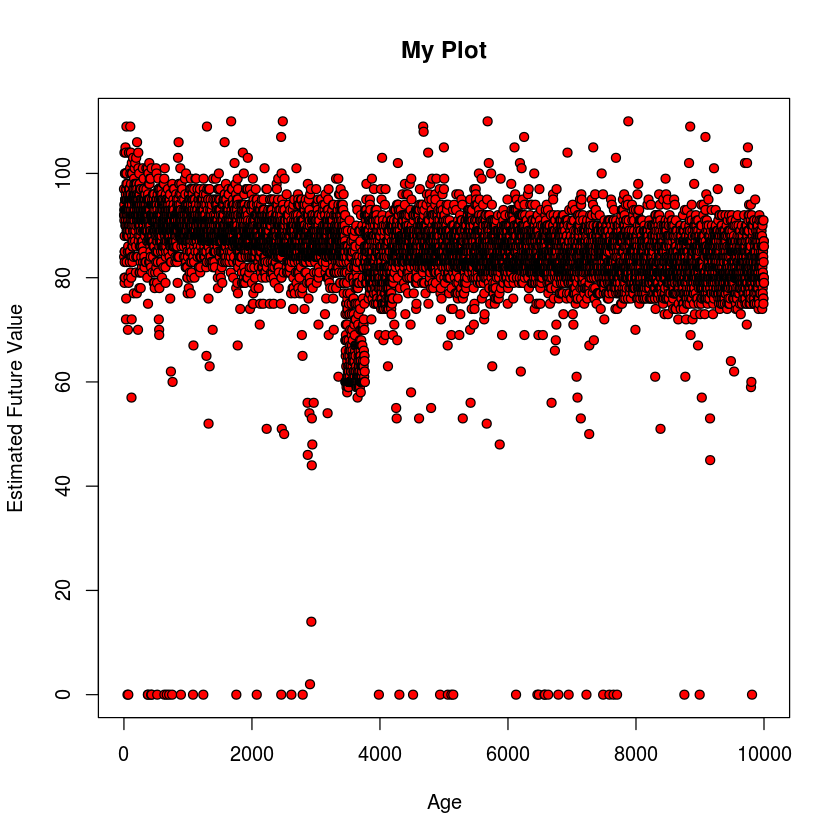

In [77]:
customer<-df
plot(df$Age,
     df$FutureValue, 
     type="p", 
     pch=21, 
     col="black", 
     bg="red", 
     xlab="Age", 
     ylab="Estimated Future Value",
     main="My Plot")


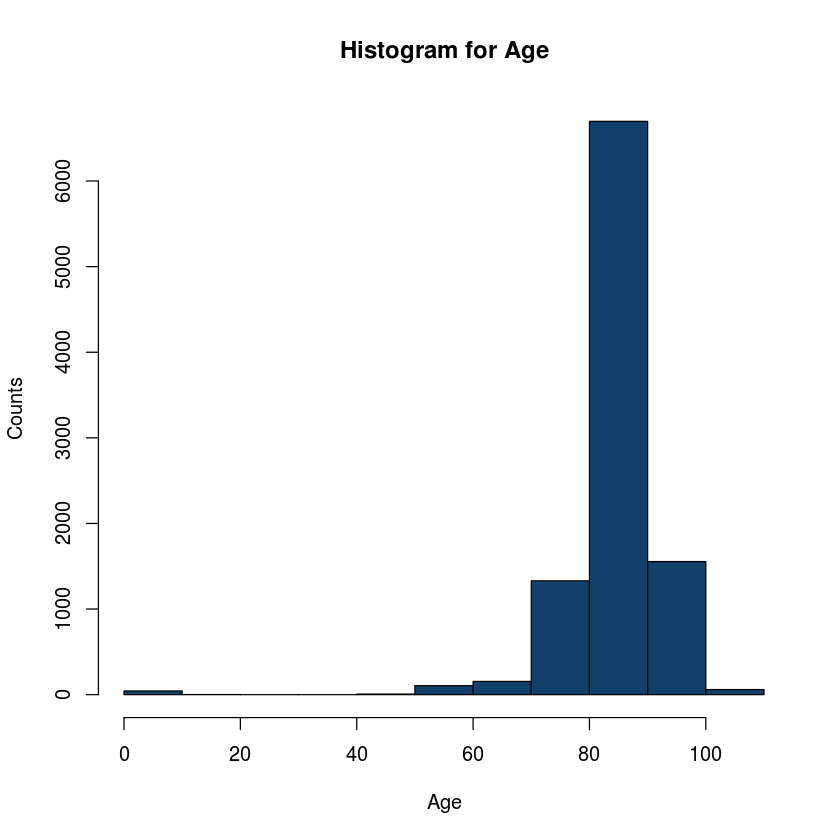

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot download all files”Warning message:
“package ‘scatterplot3d’ is not available (for R version 3.3.2)”

ERROR: Error in library(scatterplot3d): there is no package called ‘scatterplot3d’


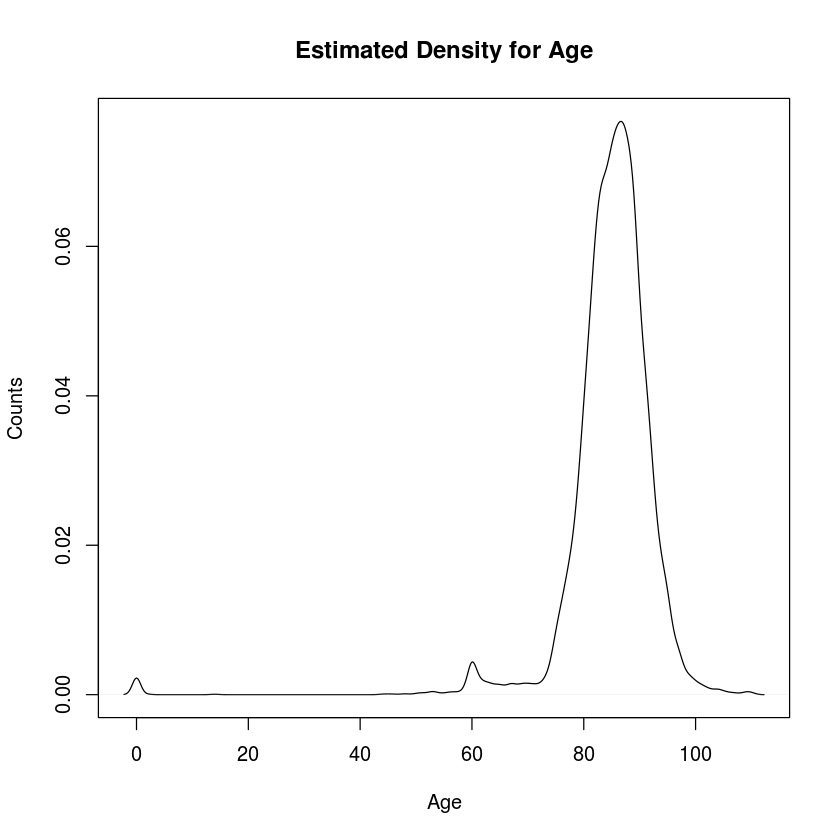

In [84]:
# Histograms and Density plots for numeric fields. Plotting 3-D plots.
bar.color <- rgb(red=17, blue=107, green=64, maxColorValue=255)
hist(df$Age, 
     breaks=10,
     col=bar.color, 
     xlab="Age", 
     ylab="Counts", 
     main="Histogram for Age")

age.density <- density(df$Age, na.rm=TRUE)

plot(age.density, 
     xlab="Age",
     ylab="Counts",
     main="Estimated Density for Age") 





 x <- rnorm(1000,mean=20,sd=5)
 y <- rnorm(1000,mean=15,sd=3)
 z <- rnorm(1000,mean=25,sd=8)

install.packages("scatterplot3d", dependencies = TRUE)


library(scatterplot3d)
scatterplot3d(x,y,z)


In [ ]:
# Bonus Charts

Pair plots help us to quickly get a sense of correlation between the variables 
present in the data by plotting scatter plots w.r.t to the available independent variables.

A much more simpler  and elegant way to draw simple graphs is to use the 
lattice library in R.The lattice provides more intuitive syntax and more precise and beautiful graphs as compared to traditional R plot.


In [85]:
pairs(subset(df,TRUE,c("FutureValue","Age","PreviousOrders")),
pch=21,
bg=my.colors[match(df$Segment,segments)])


library(lattice)


xyplot(FutureValue~Age,data=df,
 
xlab="Age",
 
ylab="Estimated Future Value",

main="My Trellis Graph")


xyplot(FutureValue~Age|Segment,
 
data=df,
 
xlab="Age",
 
ylab="Estimated Future Value",
 
main="My Trellis Graph by Segment")



ERROR: Error in `[.data.frame`(x, r, vars, drop = drop): undefined columns selected
